# Imports

In [233]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

from macros import column_groups, DATA_PATH, DATA_SPLIT_PATH, ORIGINAL_DATASET_NAME

# Loading

In [250]:
df = pd.read_csv(
    os.path.join(DATA_SPLIT_PATH, "student_questionnaire.csv"), low_memory=False
)
df = df.set_index("id_student")
df

,a1,a2,a3a,a3b,living_with_father_mother,a3c,a3d,a3et,a3f,a4,...,a163k,a166f,a166k,a171h,a177d,a211a,a222b,country_iso_cnac,country_iso_nac,weight
id_student,,,,,,,,,,,,,,,,,,,,,
1,2.0,2007.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2007.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,2007.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2007.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,2007.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83853,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
83854,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN
83855,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,2.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN


In [251]:
# Load identifiers and change float columns to int
ids = pd.read_csv(os.path.join(DATA_SPLIT_PATH, "identifiers.csv"), low_memory=False)
ids = ids.set_index("id_student")
int_identifiers = [col for col in ids.columns if col not in ["id_class_group"]]
ids[int_identifiers] = ids[int_identifiers].astype("Int64")
ids

,id_student_original,id_year,id_grade,id_class_group,id_school,id_student_16_19,id_school_16_19
id_student,,,,,,,
1,33613,2016,3,A,2415,14374,569
2,19294,2016,3,A,1842,8001,273
3,19587,2016,3,NaN,1432,8142,82
4,29985,2016,3,A,2280,12800,505
5,6982,2016,3,A,2040,2606,390
...,...,...,...,...,...,...,...
83853,2500,2019,6,B,1278,<NA>,271
83854,5784,2019,6,A,1079,<NA>,78
83855,7708,2019,6,X,1486,3036,459


In [253]:
# Load identifiers and change float columns to int
scores = pd.read_csv(
    os.path.join(DATA_SPLIT_PATH, "student_scores.csv"), low_memory=False
)
scores = scores.set_index("id_student")
# int_identifiers = [col for col in ids.columns if col not in ["id_class_group"]]
# ids[int_identifiers] = ids[int_identifiers].astype('Int64')
scores

,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
id_student,,,,,,
1,564.8700,3.0,535.1500,3.0,NaN,NaN
2,388.3400,1.0,293.7000,1.0,NaN,NaN
3,386.5900,1.0,514.8100,3.0,NaN,NaN
4,487.7600,2.0,449.2500,2.0,NaN,NaN
5,709.7900,4.0,598.7200,3.0,NaN,NaN
...,...,...,...,...,...,...
83853,400.8625,2.0,446.6522,2.0,294.7474,1.0
83854,597.0243,3.0,632.6043,4.0,633.2966,4.0
83855,707.9254,4.0,400.2761,2.0,477.5056,2.0


In [254]:
ids = pd.merge(ids, scores, left_index=True, right_index=True)
df = pd.merge(ids, df, left_index=True, right_index=True)
df

,id_student_original,id_year,id_grade,id_class_group,id_school,id_student_16_19,id_school_16_19,score_MAT,level_MAT,score_LEN,...,a163k,a166f,a166k,a171h,a177d,a211a,a222b,country_iso_cnac,country_iso_nac,weight
id_student,,,,,,,,,,,,,,,,,,,,,
1,33613,2016,3,A,2415,14374,569,564.8700,3.0,535.1500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19294,2016,3,A,1842,8001,273,388.3400,1.0,293.7000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19587,2016,3,NaN,1432,8142,82,386.5900,1.0,514.8100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29985,2016,3,A,2280,12800,505,487.7600,2.0,449.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6982,2016,3,A,2040,2606,390,709.7900,4.0,598.7200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83853,2500,2019,6,B,1278,<NA>,271,400.8625,2.0,446.6522,...,1.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
83854,5784,2019,6,A,1079,<NA>,78,597.0243,3.0,632.6043,...,1.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN
83855,7708,2019,6,X,1486,3036,459,707.9254,4.0,400.2761,...,2.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN


# Analysis

## Utils

In [261]:
def print_statistics(columns):
    print("MISSING VALUES")
    # print(df[columns].isna().sum())
    # print()
    # print("Percentage")
    print(df[columns].isna().sum() / df.shape[0] * 100)
    # print()
    # print("DISTINCT VALUES")
    # print(df[columns].value_counts())
    # print()

    corr = df[
        columns
        + [
            "score_MAT",
            "level_MAT",
            "score_LEN",
            "level_LEN",
            "score_ING",
            "level_ING",
        ]
    ].corr()
    
    return corr

## Sex, Birth year: rename

In [81]:
current_columns = ["a1", "a2"]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a1     4.399156
a2    34.160535
dtype: float64


,a1,a2,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a1,1.000000,0.007121,-0.034178,-0.033343,0.149716,0.144840,0.107751,0.101525
a2,0.007121,1.000000,0.049557,0.048313,0.052564,0.052440,0.060428,0.052448
score_MAT,-0.034178,0.049557,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,-0.033343,0.048313,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.149716,0.052564,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.144840,0.052440,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.107751,0.060428,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.101525,0.052448,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


## Living with: lambda + drop
- better aggregation?

In [123]:
current_columns = ["a3a", "a3b", "living_with_father_mother", "a3c", "a3d", "a3et"]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a3a                          39.439761
a3b                          44.859702
living_with_father_mother    45.550163
a3c                          49.691737
a3d                          65.330265
a3et                         68.682400
dtype: float64


,a3a,a3b,living_with_father_mother,a3c,a3d,a3et,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a3a,1.000000,0.116596,0.363517,0.166632,-0.094964,-0.061045,-0.036104,-0.036478,-0.039652,-0.039338,-0.065230,-0.060540
a3b,0.116596,1.000000,0.944184,0.276950,-0.107926,-0.131156,-0.063902,-0.062463,-0.066654,-0.060769,-0.085209,-0.076969
living_with_father_mother,0.363517,0.944184,1.000000,0.304234,-0.110912,-0.146009,-0.071954,-0.070433,-0.076143,-0.070631,-0.102154,-0.093072
a3c,0.166632,0.276950,0.304234,1.000000,0.025544,0.029994,-0.012337,-0.011069,-0.001275,-0.001119,-0.011578,-0.004708
a3d,-0.094964,-0.107926,-0.110912,0.025544,1.000000,0.266217,0.076768,0.071484,0.083331,0.081382,0.088625,0.093330
a3et,-0.061045,-0.131156,-0.146009,0.029994,0.266217,1.000000,0.052785,0.050928,0.056121,0.055284,0.055049,0.054594
score_MAT,-0.036104,-0.063902,-0.071954,-0.012337,0.076768,0.052785,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,-0.036478,-0.062463,-0.070433,-0.011069,0.071484,0.050928,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,-0.039652,-0.066654,-0.076143,-0.001275,0.083331,0.056121,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,-0.039338,-0.060769,-0.070631,-0.001119,0.081382,0.055284,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060


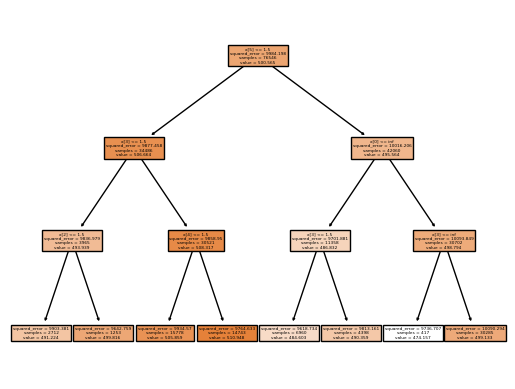

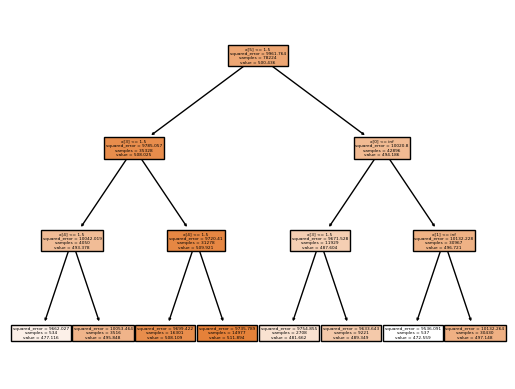

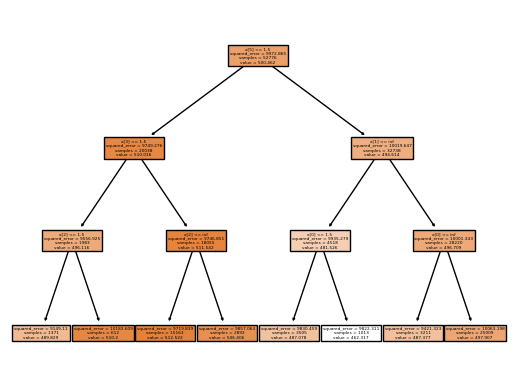

In [211]:
for subject in ["MAT", "LEN", "ING"]:
        regr = tree.DecisionTreeRegressor(max_depth=3)
        regr = regr.fit(df[~df[f"score_{subject}"].isna()][[
                "a3a",
                "a3b",
                "a3c",
                "a3d",
                "a3et",
                "living_with_father_mother",]], df[~df[f"score_{subject}"].isna()][f"score_{subject}"])
        plt.figure()
        tree.plot_tree(regr, filled=True)
        plt.savefig(f"living_with_3_{subject}.svg", format="svg")

In [255]:
df_copy = df
df_copy["living_with"] = df_copy.apply(
    lambda x: (
        0 # "BOTH_PARENTS"
        if x["living_with_father_mother"] == 1.0 and x["a3d"] == 2.0  # only parents
        else (
            1 # "BOTH_PARENTS_RELATIVES"
            if x["living_with_father_mother"] == 1.0
            and x["a3d"] == 1.0  # parents and relatives
            else (
                2 # "SINGLE_PARENT"
                if x["a3a"] + x["a3b"] == 3.0
                and x["a3d"] == 2.0  # one parent and no relatives
                else (
                    3# "SINGLE_PARENT_RELATIVES"
                    if x["a3a"] + x["a3b"] == 3.0
                    and x["a3d"] == 1.0  # one parent and no relatives
                    else (
                    4 # "ONLY_RELATIVES"
                    if x["a3a"] + x["a3b"] == 4.0
                    and x["a3d"] == 1.0  # one parent and no relatives
                    else (
                        5 # "OTHER"
                        ))
                )
            )
        )
    ),
    axis=1,
)
# df_copy[["a3a"]].isna().sum() / df_copy.shape[0]
# df_copy[["a3a", "living_with"]].value_counts()
df_copy[["a3a", "a3b", "a3d", "living_with"]].value_counts()

a3a  a3b  a3d  living_with
1.0  1.0  2.0  0              16318
          1.0  1               4369
     2.0  2.0  2               4191
          1.0  3               1737
2.0  1.0  2.0  2                487
     2.0  1.0  4                348
     1.0  1.0  3                177
     2.0  2.0  5                135
Name: count, dtype: int64

## Repeat: rename a4 + drop others

In [212]:
current_columns = [
            "a4",
            "repeater",
            #
            "a41",
            "a42",]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a4          19.353185
repeater    19.353185
a41         89.100493
a42         89.051600
dtype: float64


,a4,repeater,a41,a42,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a4,1.000000,0.938139,0.544867,0.818189,-0.187035,-0.179028,-0.211072,-0.196200,-0.247258,-0.230254
repeater,0.938139,1.000000,0.544867,0.818189,-0.186890,-0.179074,-0.208438,-0.192910,-0.250749,-0.231987
a41,0.544867,0.544867,1.000000,0.172371,-0.141400,-0.139554,-0.218998,-0.206333,-0.257405,-0.241871
a42,0.818189,0.818189,0.172371,1.000000,-0.213128,-0.208572,-0.270589,-0.255029,-0.297274,-0.288392
score_MAT,-0.187035,-0.186890,-0.141400,-0.213128,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,-0.179028,-0.179074,-0.139554,-0.208572,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,-0.211072,-0.208438,-0.218998,-0.270589,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,-0.196200,-0.192910,-0.206333,-0.255029,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,-0.247258,-0.250749,-0.257405,-0.297274,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,-0.230254,-0.231987,-0.241871,-0.288392,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


In [213]:
print("DISTINCT VALUES")
df[current_columns].value_counts()

DISTINCT VALUES


a4   repeater  a41  a42
1.0  1.0       1.0  1.0    2133
2.0  2.0       1.0  2.0     417
               2.0  1.0     153
                    2.0     127
               1.0  3.0      88
               2.0  3.0      13
Name: count, dtype: int64

## Skip: rename a5 + drop others

In [216]:
current_columns = [
            "a5", "a51" ]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a5     20.396628
a51    88.999129
dtype: float64


,a5,a51,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a5,1.000000,nan,0.135348,0.129067,0.139020,0.132801,0.159124,0.150840
a51,nan,1.000000,-0.188219,-0.182695,-0.168060,-0.160080,-0.184629,-0.177321
score_MAT,0.135348,-0.188219,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.129067,-0.182695,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.139020,-0.168060,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.132801,-0.160080,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.159124,-0.184629,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.150840,-0.177321,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


In [220]:
print("DISTINCT VALUES")
df[current_columns]

DISTINCT VALUES


,a5,a51
id_student,,
1,4.0,NaN
2,4.0,NaN
3,4.0,NaN
4,4.0,NaN
5,4.0,NaN
...,...,...
83853,4.0,NaN
83854,4.0,NaN
83855,4.0,NaN


## Homeworks: rename a7 + drop others

In [221]:
current_columns = ["a6nm", "a7", "a61", "a71",]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a6nm    62.861777
a7      19.784872
a61     50.394123
a71     74.969293
dtype: float64


,a6nm,a7,a61,a71,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a6nm,1.000000,0.070558,-0.038283,nan,0.045842,0.040847,0.034946,0.036581,0.008578,0.009152
a7,0.070558,1.000000,0.095849,0.197868,0.069256,0.066814,0.076241,0.072528,0.087214,0.083958
a61,-0.038283,0.095849,1.000000,nan,0.038819,0.038117,0.055529,0.043835,0.113357,0.109543
a71,nan,0.197868,nan,1.000000,0.038828,0.034300,0.043430,0.038468,0.026931,0.028033
score_MAT,0.045842,0.069256,0.038819,0.038828,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.040847,0.066814,0.038117,0.034300,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.034946,0.076241,0.055529,0.043430,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.036581,0.072528,0.043835,0.038468,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.008578,0.087214,0.113357,0.026931,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.009152,0.083958,0.109543,0.028033,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


In [225]:
df[["a6nm", "a7", "a61", "a71"]]
df[["a6nm", "a7"]].value_counts()

a6nm  a7 
30.0  4.0    6476
      3.0    4789
      2.0    2455
0.0   4.0    1472
      3.0    1045
             ... 
14.0  0.0       1
75.0  1.0       1
      2.0       1
      3.0       1
3.0   0.0       1
Name: count, Length: 308, dtype: int64

## Frequency of computer: aggregate (mean) + drop
- normalize

In [241]:
current_columns = ["a8a", "a8b", "a8c"]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a8a    13.537331
a8b    15.937847
a8c    20.449098
dtype: float64


,a8a,a8b,a8c,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a8a,1.000000,0.203203,0.287153,0.005277,0.003453,0.021739,0.018950,0.065944,0.064127
a8b,0.203203,1.000000,0.077801,-0.009366,-0.012130,-0.020471,-0.020518,0.015083,0.015363
a8c,0.287153,0.077801,1.000000,-0.071665,-0.069213,-0.067247,-0.066593,-0.068104,-0.063728
score_MAT,0.005277,-0.009366,-0.071665,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.003453,-0.012130,-0.069213,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.021739,-0.020471,-0.067247,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.018950,-0.020518,-0.066593,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.065944,0.015083,-0.068104,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.064127,0.015363,-0.063728,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


In [228]:
df[current_columns].value_counts()

a8a  a8b  a8c
2.0  2.0  1.0    6735
     1.0  1.0    6267
3.0  2.0  1.0    5007
1.0  2.0  1.0    4003
     1.0  1.0    3808
                 ... 
3.0  4.0  4.0      43
1.0  1.0  4.0      39
     4.0  3.0      25
2.0  4.0  4.0      22
1.0  4.0  4.0      16
Name: count, Length: 64, dtype: int64

In [265]:
df_copy = df
print(df_copy[["a8a", "a8b", "a8c"]])
df_copy.apply(lambda x: x[["a8a", "a8b", "a8c"]].mean(), axis=1)
# df[current_columns].mean(axis=1)

            a8a  a8b  a8c
id_student               
1           1.0  1.0  2.0
2           2.0  NaN  NaN
3           NaN  3.0  NaN
4           2.0  2.0  2.0
5           1.0  1.0  1.0
...         ...  ...  ...
83853       4.0  NaN  NaN
83854       1.0  2.0  1.0
83855       1.0  3.0  1.0
83856       2.0  1.0  1.0
83857       4.0  3.0  2.0

[83857 rows x 3 columns]


id_student
1        1.333333
2        2.000000
3        3.000000
4        2.000000
5        1.000000
           ...   
83853    4.000000
83854    1.333333
83855    1.666667
83856    1.333333
83857    3.000000
Length: 83857, dtype: float64

## Classroom condition: drop

In [90]:
current_columns = ["a09a", "a09b", "a09c", "a09d", "a09e"]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a09a    92.519408
a09b    92.520601
a09c    92.518216
a09d    92.525371
a09e    92.525371
dtype: float64


,a09a,a09b,a09c,a09d,a09e,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a09a,1.000000,0.577021,-0.342760,0.562799,-0.305292,0.099671,0.093014,0.083245,0.088060,0.095469,0.091298
a09b,0.577021,1.000000,-0.402824,0.519614,-0.310097,0.097034,0.091980,0.055425,0.056183,0.072361,0.065211
a09c,-0.342760,-0.402824,1.000000,-0.318280,0.479302,-0.065852,-0.066414,-0.021569,-0.027480,-0.033306,-0.027963
a09d,0.562799,0.519614,-0.318280,1.000000,-0.304948,0.110686,0.101238,0.081053,0.085368,0.096884,0.094197
a09e,-0.305292,-0.310097,0.479302,-0.304948,1.000000,-0.066023,-0.067074,-0.050239,-0.051079,-0.043519,-0.038265
score_MAT,0.099671,0.097034,-0.065852,0.110686,-0.066023,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.093014,0.091980,-0.066414,0.101238,-0.067074,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.083245,0.055425,-0.021569,0.081053,-0.050239,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.088060,0.056183,-0.027480,0.085368,-0.051079,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.095469,0.072361,-0.033306,0.096884,-0.043519,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457


## Frequency I use the internet: aggregate (sum) + drop
- normalize

In [91]:
current_columns = ["a9a", "a9b", "a9c", "a9d", "a9e", "a9f", "a9g"]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a9a    16.955054
a9b    17.990150
a9c    18.320474
a9d    18.011615
a9e    18.101053
a9f    18.076010
a9g    60.504192
dtype: float64


,a9a,a9b,a9c,a9d,a9e,a9f,a9g,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a9a,1.000000,0.098545,0.174382,0.255882,0.295241,0.235196,0.122068,0.017951,0.016921,0.041534,0.035506,0.064842,0.063517
a9b,0.098545,1.000000,0.264026,0.291024,0.256590,0.149346,0.063746,0.009036,0.008623,-0.051856,-0.052595,-0.011234,-0.009785
a9c,0.174382,0.264026,1.000000,0.214973,0.208912,0.183447,0.108461,-0.025146,-0.024948,-0.066764,-0.064409,-0.055404,-0.051276
a9d,0.255882,0.291024,0.214973,1.000000,0.378066,0.390542,0.375365,0.000147,0.001230,0.026744,0.019762,0.037073,0.038236
a9e,0.295241,0.256590,0.208912,0.378066,1.000000,0.298381,0.194725,0.034553,0.031814,0.044736,0.038923,0.054027,0.052203
a9f,0.235196,0.149346,0.183447,0.390542,0.298381,1.000000,0.605050,-0.022101,-0.021943,-0.002008,-0.005871,-0.017192,-0.016077
a9g,0.122068,0.063746,0.108461,0.375365,0.194725,0.605050,1.000000,-0.078053,-0.075545,-0.021707,-0.024783,-0.041401,-0.041317
score_MAT,0.017951,0.009036,-0.025146,0.000147,0.034553,-0.022101,-0.078053,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.016921,0.008623,-0.024948,0.001230,0.031814,-0.021943,-0.075545,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.041534,-0.051856,-0.066764,0.026744,0.044736,-0.002008,-0.021707,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328


## Work with teachers: aggregate (mean) + drop
- normalize

In [96]:
current_columns = ["a10a", "a10b", "a10c", "a10d", "a10e", "a10f", "a10g", "a10h", "a10i", "a10j", "a10k", "a10l", "a10m", "a10n"]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a10a    10.043288
a10b    10.368842
a10c    10.467820
a10d    10.192351
a10e    17.761189
a10f    13.759138
a10g    13.965441
a10h    10.635964
a10i    18.059315
a10j    14.099002
a10k    57.202142
a10l    57.011341
a10m    89.040867
a10n    89.034905
dtype: float64


,a10a,a10b,a10c,a10d,a10e,a10f,a10g,a10h,a10i,a10j,a10k,a10l,a10m,a10n,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a10a,1.000000,0.176691,0.176068,0.154947,0.109036,0.147756,0.121415,0.071812,0.154549,0.158115,0.088556,0.166526,0.232681,0.253554,-0.034934,-0.033739,-0.027960,-0.024996,-0.039945,-0.038285
a10b,0.176691,1.000000,0.231435,0.134526,0.236505,0.119771,0.044889,0.243466,0.169336,0.128476,0.193598,0.154018,0.155862,0.160151,-0.055977,-0.055051,-0.037052,-0.034338,-0.032196,-0.033439
a10c,0.176068,0.231435,1.000000,0.263285,0.243748,0.171843,0.073668,0.153344,0.144053,0.197936,0.268490,0.201121,0.153114,0.215634,-0.026498,-0.027986,-0.014603,-0.012747,-0.019537,-0.019831
a10d,0.154947,0.134526,0.263285,1.000000,0.187879,0.223180,0.067946,0.112290,0.138238,0.151454,0.168405,0.192747,0.282046,0.292107,0.039939,0.036784,0.052948,0.053886,0.071252,0.065597
a10e,0.109036,0.236505,0.243748,0.187879,1.000000,0.092775,0.043575,0.176343,0.139017,0.108675,0.265417,0.139112,0.095995,0.139537,-0.034537,-0.034631,-0.031875,-0.028469,-0.040455,-0.039059
a10f,0.147756,0.119771,0.171843,0.223180,0.092775,1.000000,0.112128,0.094520,0.091473,0.231252,0.052776,0.199539,0.372863,0.266086,0.079628,0.075521,0.097779,0.096708,0.082850,0.075032
a10g,0.121415,0.044889,0.073668,0.067946,0.043575,0.112128,1.000000,-0.101840,0.087996,0.253658,0.097048,0.057022,0.151839,0.100562,-0.008780,-0.008084,0.004885,0.005740,0.024016,0.021846
a10h,0.071812,0.243466,0.153344,0.112290,0.176343,0.094520,-0.101840,1.000000,0.134295,0.057586,0.168622,0.137647,0.136734,0.159034,-0.038273,-0.038502,-0.027751,-0.027523,-0.028517,-0.028313
a10i,0.154549,0.169336,0.144053,0.138238,0.139017,0.091473,0.087996,0.134295,1.000000,0.146080,0.131464,0.102292,0.327541,0.195208,-0.076632,-0.073068,-0.044338,-0.045678,-0.066438,-0.065993
a10j,0.158115,0.128476,0.197936,0.151454,0.108675,0.231252,0.253658,0.057586,0.146080,1.000000,0.056146,0.060025,0.134972,0.134532,0.006727,0.005101,0.004862,0.006721,0.004079,0.001538


## Materials in class: aggregate (mean) + drop
- normalize

In [101]:
column_number = 11
column_letters = ["a", "b", "c", "d", "e", "f", "g", "h"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a11a', 'a11b', 'a11c', 'a11d', 'a11e', 'a11f', 'a11g', 'a11h']
MISSING VALUES
a11a     9.847717
a11b    10.309217
a11c    10.647889
a11d    10.706321
a11e    10.433238
a11f    25.093910
a11g    57.134169
a11h    10.170886
dtype: float64


,a11a,a11b,a11c,a11d,a11e,a11f,a11g,a11h,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a11a,1.000000,0.113518,0.005493,-0.116072,-0.070896,0.127422,-0.037000,-0.003158,0.004460,0.005183,0.015164,0.014652,0.017601,0.014332
a11b,0.113518,1.000000,0.241375,0.136831,0.146794,0.131554,0.223828,0.125608,-0.055181,-0.052437,-0.043688,-0.041520,-0.045914,-0.045732
a11c,0.005493,0.241375,1.000000,0.138273,0.191292,0.076588,0.204435,0.106336,-0.062688,-0.059335,-0.070776,-0.065948,-0.060075,-0.056722
a11d,-0.116072,0.136831,0.138273,1.000000,0.264102,0.003624,0.174234,0.191609,-0.030318,-0.032362,-0.044907,-0.042734,-0.005584,-0.006026
a11e,-0.070896,0.146794,0.191292,0.264102,1.000000,0.068397,0.223303,0.254113,0.000637,-0.001009,0.010197,0.009676,0.025933,0.023297
a11f,0.127422,0.131554,0.076588,0.003624,0.068397,1.000000,0.133564,0.107500,0.019088,0.017367,0.041279,0.036043,0.031067,0.026252
a11g,-0.037000,0.223828,0.204435,0.174234,0.223303,0.133564,1.000000,0.139241,-0.082776,-0.080695,-0.081311,-0.079082,-0.086593,-0.084554
a11h,-0.003158,0.125608,0.106336,0.191609,0.254113,0.107500,0.139241,1.000000,-0.015514,-0.019788,-0.003398,-0.000368,-0.022076,-0.020845
score_MAT,0.004460,-0.055181,-0.062688,-0.030318,0.000637,0.019088,-0.082776,-0.015514,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.005183,-0.052437,-0.059335,-0.032362,-0.001009,0.017367,-0.080695,-0.019788,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475


## Evaluation: aggregate (mean) + drop
- we could consider solely the ones wrt. the no. tests
- normalize

In [102]:
column_number = 12
column_letters = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a12a', 'a12b', 'a12c', 'a12d', 'a12e', 'a12f', 'a12g', 'a12h', 'a12i']
MISSING VALUES
a12a    17.476180
a12b    17.435634
a12c    17.993727
a12d    17.881632
a12e    17.937680
a12f    18.014000
a12g    17.999690
a12h    17.789809
a12i    17.822007
dtype: float64


,a12a,a12b,a12c,a12d,a12e,a12f,a12g,a12h,a12i,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a12a,1.000000,0.060953,0.135777,0.212605,0.243949,0.233742,0.240316,0.198765,0.062197,-0.065332,-0.064929,-0.060451,-0.055179,-0.057215,-0.054440
a12b,0.060953,1.000000,-0.032615,0.070696,0.095296,0.027157,0.018293,0.166141,0.139814,0.070594,0.068618,0.082919,0.077963,0.076012,0.072590
a12c,0.135777,-0.032615,1.000000,0.178565,0.149005,0.171346,0.222577,0.085631,0.049077,-0.068665,-0.065755,-0.057290,-0.050949,-0.096978,-0.095333
a12d,0.212605,0.070696,0.178565,1.000000,0.534776,0.205558,0.281672,0.286160,0.139819,-0.006821,-0.006683,-0.004605,-0.000523,-0.035944,-0.040062
a12e,0.243949,0.095296,0.149005,0.534776,1.000000,0.217033,0.287305,0.320899,0.154808,-0.001261,-0.001332,0.003752,0.007365,-0.017753,-0.020011
a12f,0.233742,0.027157,0.171346,0.205558,0.217033,1.000000,0.244436,0.136838,0.039628,-0.044637,-0.046696,-0.037233,-0.035550,-0.024321,-0.022491
a12g,0.240316,0.018293,0.222577,0.281672,0.287305,0.244436,1.000000,0.298214,0.177869,-0.050913,-0.050814,-0.038676,-0.034551,-0.071541,-0.070552
a12h,0.198765,0.166141,0.085631,0.286160,0.320899,0.136838,0.298214,1.000000,0.325136,0.068681,0.065117,0.091752,0.090034,0.057304,0.051465
a12i,0.062197,0.139814,0.049077,0.139819,0.154808,0.039628,0.177869,0.325136,1.000000,0.049204,0.047298,0.077393,0.072325,0.061144,0.056434
score_MAT,-0.065332,0.070594,-0.068665,-0.006821,-0.001261,-0.044637,-0.050913,0.068681,0.049204,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502


## [Degree of agreement] Teacher relationship: drop

In [103]:
column_number = 13
column_letters = ["a", "b", "c", "d", "e"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a13a', 'a13b', 'a13c', 'a13d', 'a13e']
MISSING VALUES
a13a    56.543878
a13b    56.733487
a13c    56.869432
a13d    56.957678
a13e    13.991676
dtype: float64


,a13a,a13b,a13c,a13d,a13e,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a13a,1.000000,0.382755,0.378167,0.332386,0.426233,0.064351,0.060338,0.104499,0.094346,0.095160,0.087062
a13b,0.382755,1.000000,0.428383,0.394218,0.432180,0.056605,0.051425,0.087670,0.080275,0.040364,0.036871
a13c,0.378167,0.428383,1.000000,0.410418,0.418408,0.042937,0.039020,0.082451,0.078054,0.057770,0.051543
a13d,0.332386,0.394218,0.410418,1.000000,0.363293,0.006888,0.008009,0.041062,0.037222,0.016473,0.011661
a13e,0.426233,0.432180,0.418408,0.363293,1.000000,0.059240,0.058057,0.089009,0.084735,0.061020,0.053313
score_MAT,0.064351,0.056605,0.042937,0.006888,0.059240,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.060338,0.051425,0.039020,0.008009,0.058057,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.104499,0.087670,0.082451,0.041062,0.089009,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.094346,0.080275,0.078054,0.037222,0.084735,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.095160,0.040364,0.057770,0.016473,0.061020,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457


## [Degree of agreement] classmate relationships: lambda + drop
- normalize
- check semantics

In [104]:
column_number = 14
column_letters = ["a", "b", "c", "d", "e", "f", "g", "h"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a14a', 'a14b', 'a14c', 'a14d', 'a14e', 'a14f', 'a14g', 'a14h']
MISSING VALUES
a14a     9.778552
a14b    14.103772
a14c    58.392263
a14d    21.667839
a14e    13.966634
a14f    13.961864
a14g    24.974659
a14h    10.240052
dtype: float64


,a14a,a14b,a14c,a14d,a14e,a14f,a14g,a14h,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a14a,1.000000,0.424387,-0.257886,-0.218257,-0.113476,-0.137219,0.372170,0.337239,0.043092,0.039865,0.078551,0.074961,0.047645,0.042805
a14b,0.424387,1.000000,-0.235621,-0.235787,-0.159147,-0.262575,0.432196,0.406942,0.081480,0.077312,0.090867,0.086579,0.077535,0.074198
a14c,-0.257886,-0.235621,1.000000,0.424637,0.334503,0.259079,-0.179990,-0.179188,-0.098519,-0.094000,-0.126278,-0.118702,-0.094008,-0.089004
a14d,-0.218257,-0.235787,0.424637,1.000000,0.332630,0.304763,-0.180636,-0.194018,-0.098392,-0.096579,-0.125385,-0.120283,-0.096012,-0.090358
a14e,-0.113476,-0.159147,0.334503,0.332630,1.000000,0.292573,-0.116148,-0.086285,-0.089327,-0.086318,-0.093984,-0.090389,-0.066921,-0.064332
a14f,-0.137219,-0.262575,0.259079,0.304763,0.292573,1.000000,-0.166769,-0.185794,-0.050237,-0.047132,-0.037699,-0.036338,-0.035480,-0.035968
a14g,0.372170,0.432196,-0.179990,-0.180636,-0.116148,-0.166769,1.000000,0.379512,0.058650,0.054848,0.097377,0.090494,0.091520,0.088089
a14h,0.337239,0.406942,-0.179188,-0.194018,-0.086285,-0.185794,0.379512,1.000000,0.016724,0.015007,0.051495,0.048664,0.049859,0.048249
score_MAT,0.043092,0.081480,-0.098519,-0.098392,-0.089327,-0.050237,0.058650,0.016724,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.039865,0.077312,-0.094000,-0.096579,-0.086318,-0.047132,0.054848,0.015007,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475


## [Degree of agreement] Teacher performance: aggregate (mean) + drop
- normalize

In [105]:
column_number = 15
column_letters = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a15a', 'a15b', 'a15c', 'a15d', 'a15e', 'a15f', 'a15g', 'a15h', 'a15i', 'a15j']
MISSING VALUES
a15a    24.799361
a15b    21.020308
a15c    24.930537
a15d    21.282660
a15e    24.853024
a15f    21.143137
a15g    24.960349
a15h    24.994932
a15i    21.283852
a15j    25.121338
dtype: float64


,a15a,a15b,a15c,a15d,a15e,a15f,a15g,a15h,a15i,a15j,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a15a,1.000000,0.281107,0.272955,0.289777,0.291167,0.261217,0.305691,0.279802,0.281424,0.270587,0.054475,0.052242,0.075329,0.068778,0.076694,0.071865
a15b,0.281107,1.000000,0.330449,0.339899,0.389409,0.404881,0.320771,0.330340,0.295074,0.351757,0.113191,0.111426,0.116959,0.110131,0.112756,0.105017
a15c,0.272955,0.330449,1.000000,0.427736,0.386225,0.416501,0.356798,0.382715,0.361437,0.386890,0.049874,0.048168,0.093072,0.085288,0.036108,0.030795
a15d,0.289777,0.339899,0.427736,1.000000,0.419643,0.410463,0.418386,0.456873,0.397760,0.425474,0.001653,0.000520,0.034227,0.029892,-0.004719,-0.005529
a15e,0.291167,0.389409,0.386225,0.419643,1.000000,0.503535,0.422747,0.442260,0.440067,0.509139,0.038171,0.036539,0.068430,0.063287,0.022688,0.019177
a15f,0.261217,0.404881,0.416501,0.410463,0.503535,1.000000,0.386755,0.470632,0.422106,0.466059,0.036820,0.034037,0.045727,0.040198,0.008337,0.005098
a15g,0.305691,0.320771,0.356798,0.418386,0.422747,0.386755,1.000000,0.411808,0.404347,0.446335,0.012457,0.011998,0.047696,0.043251,0.020230,0.016478
a15h,0.279802,0.330340,0.382715,0.456873,0.442260,0.470632,0.411808,1.000000,0.450875,0.449468,0.017429,0.018377,0.042997,0.039549,0.002319,0.001211
a15i,0.281424,0.295074,0.361437,0.397760,0.440067,0.422106,0.404347,0.450875,1.000000,0.446009,0.007536,0.006799,0.040986,0.037372,-0.001985,-0.004898
a15j,0.270587,0.351757,0.386890,0.425474,0.509139,0.466059,0.446335,0.449468,0.446009,1.000000,0.015928,0.013555,0.045040,0.042085,0.008515,0.005804


## [Degree of agreement] Class vibe: aggregate (mean) + drop
- normalize

In [109]:
column_number = 16
column_letters = ["i", "j", "k", "l"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a16i', 'a16j', 'a16k', 'a16l']
MISSING VALUES
a16i    89.042060
a16j    89.039675
a16k    71.781724
a16l    89.038482
dtype: float64


,a16i,a16j,a16k,a16l,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a16i,1.000000,0.184882,0.196742,0.159679,0.232134,0.219985,0.096131,0.089911,0.073553,0.074623
a16j,0.184882,1.000000,0.271487,0.300207,-0.040595,-0.040370,0.041275,0.038551,-0.031935,-0.033021
a16k,0.196742,0.271487,1.000000,0.239051,0.115386,0.107889,0.155769,0.145283,0.329041,0.317192
a16l,0.159679,0.300207,0.239051,1.000000,0.021859,0.021108,0.058288,0.053078,0.029654,0.028805
score_MAT,0.232134,-0.040595,0.115386,0.021859,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.219985,-0.040370,0.107889,0.021108,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.096131,0.041275,0.155769,0.058288,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.089911,0.038551,0.145283,0.053078,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.073553,-0.031935,0.329041,0.029654,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.074623,-0.033021,0.317192,0.028805,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


## [Degree of agreement] classes: drop

## [Degree of agreement] school: lambda + drop
- normalize

In [110]:
column_number = 17
column_letters = ["a", "b", "c", "d", "e", "f", "g", "h"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a17a', 'a17b', 'a17c', 'a17d', 'a17e', 'a17f', 'a17g', 'a17h']
MISSING VALUES
a17a    13.431198
a17b    56.537916
a17c    13.872426
a17d    13.816378
a17e    13.891506
a17f    14.004794
a17g    13.743635
a17h    24.774318
dtype: float64


,a17a,a17b,a17c,a17d,a17e,a17f,a17g,a17h,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a17a,1.000000,0.487318,0.408690,-0.245574,0.409991,0.406441,0.486633,0.433680,0.013630,0.013516,0.040860,0.040286,0.013657,0.009648
a17b,0.487318,1.000000,0.454364,-0.262215,0.484485,0.491882,0.601249,0.467747,0.066362,0.066575,0.087304,0.078836,0.066809,0.061487
a17c,0.408690,0.454364,1.000000,-0.335423,0.475186,0.488729,0.582975,0.403240,0.050469,0.048215,0.089812,0.085416,0.080876,0.074920
a17d,-0.245574,-0.262215,-0.335423,1.000000,-0.300408,-0.303688,-0.419016,-0.197700,-0.076867,-0.074909,-0.090661,-0.088982,-0.080041,-0.074326
a17e,0.409991,0.484485,0.475186,-0.300408,1.000000,0.555722,0.551608,0.410464,0.078977,0.074905,0.105735,0.100704,0.090751,0.086043
a17f,0.406441,0.491882,0.488729,-0.303688,0.555722,1.000000,0.595356,0.411368,0.047005,0.045126,0.095276,0.091032,0.074660,0.068497
a17g,0.486633,0.601249,0.582975,-0.419016,0.551608,0.595356,1.000000,0.480559,0.050193,0.048879,0.085501,0.080800,0.053048,0.047444
a17h,0.433680,0.467747,0.403240,-0.197700,0.410464,0.411368,0.480559,1.000000,0.039814,0.037982,0.071292,0.063048,0.040627,0.033847
score_MAT,0.013630,0.066362,0.050469,-0.076867,0.078977,0.047005,0.050193,0.039814,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.013516,0.066575,0.048215,-0.074909,0.074905,0.045126,0.048879,0.037982,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475


## [Degree of agreement] Math: lambda + drop
- normalize

In [111]:
column_number = 20
column_letters = ["a", "b", "c", "d", "e"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a20a', 'a20b', 'a20c', 'a20d', 'a20e']
MISSING VALUES
a20a    64.454965
a20b    92.886700
a20c    64.472853
a20d    64.472853
a20e    64.463313
dtype: float64


,a20a,a20b,a20c,a20d,a20e,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a20a,1.000000,-0.288982,-0.393565,-0.384136,0.558033,0.364069,0.349327,0.212845,0.199359,0.270867,0.261970
a20b,-0.288982,1.000000,0.339659,0.402487,-0.339290,-0.178476,-0.168975,-0.152305,-0.141663,-0.109918,-0.096521
a20c,-0.393565,0.339659,1.000000,0.479492,-0.246537,-0.262813,-0.251864,-0.180720,-0.171615,-0.199256,-0.191391
a20d,-0.384136,0.402487,0.479492,1.000000,-0.375982,-0.201204,-0.192549,-0.097159,-0.089935,-0.084827,-0.079983
a20e,0.558033,-0.339290,-0.246537,-0.375982,1.000000,0.180785,0.169941,0.062635,0.057273,0.085267,0.080442
score_MAT,0.364069,-0.178476,-0.262813,-0.201204,0.180785,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.349327,-0.168975,-0.251864,-0.192549,0.169941,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.212845,-0.152305,-0.180720,-0.097159,0.062635,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.199359,-0.141663,-0.171615,-0.089935,0.057273,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.270867,-0.109918,-0.199256,-0.084827,0.085267,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457


## [Degree of agreement] reading: drop

In [112]:
column_number = 21
column_letters = ["a", "b", "c", "d", "e"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a21a', 'a21b', 'a21c', 'a21d', 'a21e']
MISSING VALUES
a21a    92.886700
a21b    64.450195
a21c    64.482393
a21d    92.886700
a21e    64.485970
dtype: float64


,a21a,a21b,a21c,a21d,a21e,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a21a,1.000000,0.008325,0.152780,0.167440,0.117766,-0.123554,-0.124422,-0.136159,-0.125940,-0.150106,-0.145886
a21b,0.008325,1.000000,-0.179438,-0.156390,-0.153154,0.140769,0.133364,0.220701,0.206375,0.258996,0.248499
a21c,0.152780,-0.179438,1.000000,0.301087,0.515224,-0.095501,-0.090734,-0.181626,-0.169658,-0.152392,-0.146364
a21d,0.167440,-0.156390,0.301087,1.000000,0.283061,-0.180202,-0.178853,-0.201262,-0.181668,-0.179866,-0.170253
a21e,0.117766,-0.153154,0.515224,0.283061,1.000000,-0.023244,-0.024573,-0.129659,-0.120190,-0.069355,-0.067230
score_MAT,-0.123554,0.140769,-0.095501,-0.180202,-0.023244,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,-0.124422,0.133364,-0.090734,-0.178853,-0.024573,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,-0.136159,0.220701,-0.181626,-0.201262,-0.129659,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,-0.125940,0.206375,-0.169658,-0.181668,-0.120190,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,-0.150106,0.258996,-0.152392,-0.179866,-0.069355,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457


## [Degree of agreement] Natural sciences: drop

In [113]:
column_number = 22
column_letters = ["a", "b", "c", "d"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a22a', 'a22b', 'a22c', 'a22d']
MISSING VALUES
a22a    71.725676
a22b    96.453486
a22c    71.750718
a22d    71.753103
dtype: float64


,a22a,a22b,a22c,a22d,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a22a,1.000000,-0.222885,-0.299226,-0.274734,0.153380,0.147838,0.167900,0.157687,0.201303,0.191613
a22b,-0.222885,1.000000,0.373628,0.417447,-0.020951,-0.017031,-0.046455,-0.040915,-0.054037,-0.051367
a22c,-0.299226,0.373628,1.000000,0.527584,-0.114651,-0.108781,-0.163728,-0.152895,-0.150367,-0.140769
a22d,-0.274734,0.417447,0.527584,1.000000,-0.002124,-0.002690,-0.071070,-0.064613,-0.033702,-0.028772
score_MAT,0.153380,-0.020951,-0.114651,-0.002124,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.147838,-0.017031,-0.108781,-0.002690,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.167900,-0.046455,-0.163728,-0.071070,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.157687,-0.040915,-0.152895,-0.064613,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.201303,-0.054037,-0.150367,-0.033702,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.191613,-0.051367,-0.140769,-0.028772,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


## [Degree of agreement] misc: drop

In [114]:
column_number = 23
column_letters = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a23a', 'a23b', 'a23c', 'a23d', 'a23e', 'a23f', 'a23g', 'a23h', 'a23i', 'a23j', 'a23k']
MISSING VALUES
a23a    89.068295
a23b    89.067102
a23c    89.073065
a23d    89.071872
a23e    89.079027
a23f    96.504764
a23g    89.075450
a23h    89.080220
a23i    96.504764
a23j    89.076642
a23k    92.573071
dtype: float64


,a23a,a23b,a23c,a23d,a23e,a23f,a23g,a23h,a23i,a23j,a23k,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a23a,1.000000,0.560401,0.139124,0.158945,-0.001256,0.172537,0.132773,0.135328,0.147972,0.112196,-0.072498,-0.076763,-0.061828,-0.012639,-0.012048,-0.035993,-0.031475
a23b,0.560401,1.000000,0.151401,0.169470,0.039575,0.159600,0.121975,0.154721,0.130186,0.104227,-0.081050,-0.139259,-0.125109,-0.067448,-0.061688,-0.076888,-0.073793
a23c,0.139124,0.151401,1.000000,0.359299,0.140613,0.103461,0.101312,0.084680,0.072821,0.039432,0.121532,0.064926,0.059350,0.042709,0.041209,0.036834,0.044041
a23d,0.158945,0.169470,0.359299,1.000000,0.097676,0.092529,0.170923,0.129533,0.090789,0.063212,0.141122,0.120503,0.121527,0.147671,0.137506,0.138722,0.125923
a23e,-0.001256,0.039575,0.140613,0.097676,1.000000,0.046090,0.057468,-0.030496,-0.448155,-0.374383,0.071352,0.037106,0.038572,0.078148,0.073701,0.068015,0.064862
a23f,0.172537,0.159600,0.103461,0.092529,0.046090,1.000000,0.471749,0.421294,0.248025,0.139362,nan,0.005733,0.004502,0.102433,0.098270,0.052848,0.045431
a23g,0.132773,0.121975,0.101312,0.170923,0.057468,0.471749,1.000000,0.473103,0.323962,0.175208,0.091668,0.056903,0.048257,0.131760,0.126140,0.119140,0.113943
a23h,0.135328,0.154721,0.084680,0.129533,-0.030496,0.421294,0.473103,1.000000,0.403549,0.261035,0.132866,0.057520,0.054080,0.108855,0.100446,0.099538,0.094750
a23i,0.147972,0.130186,0.072821,0.090789,-0.448155,0.248025,0.323962,0.403549,1.000000,0.539625,nan,-0.037850,-0.048656,-0.019286,-0.018645,0.009815,0.009045
a23j,0.112196,0.104227,0.039432,0.063212,-0.374383,0.139362,0.175208,0.261035,0.539625,1.000000,0.051855,-0.006151,-0.012205,-0.025425,-0.023466,-0.026785,-0.025530


## Next studies: drop

In [115]:
current_columns = ["a24"]
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

MISSING VALUES
a24    89.155348
dtype: float64


,a24,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a24,1.000000,-0.232824,-0.217434,-0.240784,-0.229264,-0.281085,-0.270649
score_MAT,-0.232824,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,-0.217434,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,-0.240784,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,-0.229264,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,-0.281085,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,-0.270649,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


## [Degree of agreement] Social media: drop

In [116]:
column_number = 40
column_letters = ["a", "b", "c", "d"]
current_columns = [f"a{column_number}{letter}" for letter in column_letters]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a40a', 'a40b', 'a40c', 'a40d']
MISSING VALUES
a40a    89.013440
a40b    89.014632
a40c    89.018210
a40d    92.514638
dtype: float64


,a40a,a40b,a40c,a40d,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a40a,1.000000,0.168677,0.042630,0.384409,0.037708,0.036163,0.053133,0.051307,0.070503,0.072667
a40b,0.168677,1.000000,0.301896,0.233374,-0.046532,-0.043251,-0.068154,-0.059200,-0.029853,-0.026062
a40c,0.042630,0.301896,1.000000,0.181848,-0.025584,-0.015537,-0.005925,-0.009064,-0.000178,0.001814
a40d,0.384409,0.233374,0.181848,1.000000,-0.049741,-0.047100,-0.014064,-0.009748,-0.001428,0.002145
score_MAT,0.037708,-0.046532,-0.025584,-0.049741,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.036163,-0.043251,-0.015537,-0.047100,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.053133,-0.068154,-0.005925,-0.014064,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.051307,-0.059200,-0.009064,-0.009748,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.070503,-0.029853,-0.000178,-0.001428,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.072667,-0.026062,0.001814,0.002145,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


## [Degree of agreement] English: drop

In [257]:
current_columns = ["a160k", "a162k", "a163k", "a166k"]
print(current_columns)
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['a160k', 'a162k', 'a163k', 'a166k']
MISSING VALUES
a160k    75.278152
a162k    75.298425
a163k    75.305580
a166k    92.534911
dtype: float64


,a160k,a162k,a163k,a166k,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
a160k,1.000000,-0.458640,-0.459426,nan,0.266360,0.253210,0.264425,0.252087,0.525834,0.509214
a162k,-0.458640,1.000000,0.624333,nan,-0.151920,-0.144067,-0.190600,-0.183839,-0.347655,-0.334201
a163k,-0.459426,0.624333,1.000000,nan,-0.117651,-0.111628,-0.159526,-0.153863,-0.323471,-0.311085
a166k,nan,nan,nan,1.000000,0.060519,0.054813,0.099569,0.089198,0.164639,0.161991
score_MAT,0.266360,-0.151920,-0.117651,0.060519,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,0.253210,-0.144067,-0.111628,0.054813,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,0.264425,-0.190600,-0.159526,0.099569,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,0.252087,-0.183839,-0.153863,0.089198,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.525834,-0.347655,-0.323471,0.164639,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.509214,-0.334201,-0.311085,0.161991,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000


## Countries: rename
- ordinal encoding drop

In [264]:
from sklearn.preprocessing import OrdinalEncoder

current_columns = ["country_iso_cnac", "country_iso_nac"]
print(current_columns)
# df_copy = df
# df_copy[current_columns] = OrdinalEncoder().fit_transform(df_copy[current_columns])
print(df_copy[current_columns])
corr = print_statistics(columns=current_columns)
corr.style.background_gradient(cmap="coolwarm")

['country_iso_cnac', 'country_iso_nac']
            country_iso_cnac  country_iso_nac
id_student                                   
1                        NaN              NaN
2                        NaN              NaN
3                        NaN              NaN
4                        NaN              NaN
5                        NaN              NaN
...                      ...              ...
83853                    NaN              NaN
83854                    NaN              NaN
83855                    NaN              NaN
83856                    NaN              NaN
83857                    NaN              NaN

[83857 rows x 2 columns]
MISSING VALUES
country_iso_cnac    79.354139
country_iso_nac     78.771003
dtype: float64


,country_iso_cnac,country_iso_nac,score_MAT,level_MAT,score_LEN,level_LEN,score_ING,level_ING
country_iso_cnac,1.000000,0.663876,-0.014130,-0.017020,-0.011643,-0.008836,0.011503,0.010434
country_iso_nac,0.663876,1.000000,-0.027031,-0.028454,-0.027246,-0.026003,-0.004361,0.001573
score_MAT,-0.014130,-0.027031,1.000000,0.949125,0.478365,0.458407,0.457797,0.435502
level_MAT,-0.017020,-0.028454,0.949125,1.000000,0.456791,0.439989,0.435458,0.416475
score_LEN,-0.011643,-0.027246,0.478365,0.456791,1.000000,0.949850,0.503339,0.482328
level_LEN,-0.008836,-0.026003,0.458407,0.439989,0.949850,1.000000,0.481747,0.464060
score_ING,0.011503,-0.004361,0.457797,0.435458,0.503339,0.481747,1.000000,0.955457
level_ING,0.010434,0.001573,0.435502,0.416475,0.482328,0.464060,0.955457,1.000000
